### Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
data = boston["data"]

In [6]:
feature_names = boston["feature_names"]

In [7]:
target = boston["target"]

In [8]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
y = pd.DataFrame(target, columns=["price"])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler(with_mean=False)

In [14]:
from sklearn.manifold import TSNE

In [15]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [16]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


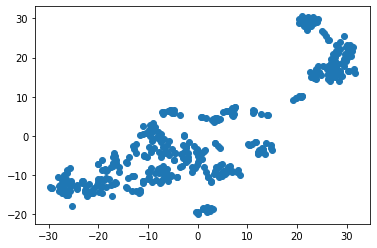

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

In [19]:
labels_train = model.fit_predict(X_train_scaled)

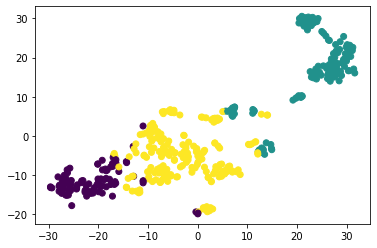

In [20]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [21]:
print('Средние значения price по кластерам на тренировочном наборе:')
print('Кластер 1: ', y_train[labels_train == 0].mean())
print('Кластер 2:', y_train[labels_train == 1].mean())
print('Кластер 3:', y_train[labels_train == 2].mean())

Средние значения price по кластерам:
Кластер 1:  price    27.788372
dtype: float64
Кластер 2: price    16.165354
dtype: float64
Кластер 3: price    24.958115
dtype: float64


In [28]:
print('Средние значения по параметру CRIM на тренировочном наборе:')
print('Кластер 1: ', X_train['CRIM'][labels_train == 0].mean())
print('Кластер 2:', X_train['CRIM'][labels_train == 1].mean())
print('Кластер 3:', X_train['CRIM'][labels_train == 2].mean())

Средние значения по параметру CRIM:
Кластер 1:  0.07356558139534886
Кластер 2: 10.797028425196853
Кластер 3: 0.42166020942408367


### Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [23]:
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [24]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

In [26]:
labels_test = model.fit_predict(X_test_scaled)

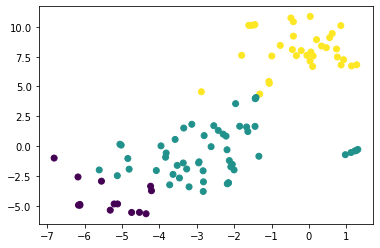

In [27]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [30]:
print('Средние значения price по кластерам На тестовом наборе:')
print('Кластер 1: ', y_train[labels_train == 0].mean())
print('Кластер 2:', y_train[labels_train == 1].mean())
print('Кластер 3:', y_train[labels_train == 2].mean())

Средние значения price по кластерам На тестовом наборе:
Кластер 1:  price    27.788372
dtype: float64
Кластер 2: price    16.165354
dtype: float64
Кластер 3: price    24.958115
dtype: float64


In [29]:
print('Средние значения по параметру CRIM на тестовом наборе:')
print('Кластер 1: ', X_train['CRIM'][labels_train == 0].mean())
print('Кластер 2:', X_train['CRIM'][labels_train == 1].mean())
print('Кластер 3:', X_train['CRIM'][labels_train == 2].mean())

Средние значения по параметру CRIM на тестовом наборе:
Кластер 1:  0.07356558139534886
Кластер 2: 10.797028425196853
Кластер 3: 0.42166020942408367
